# 机器学习背后的数学

lasso回归

## 1.导入数据

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
data=pd.read_csv('train.csv')
print(data.shape,data.shape)
data.head()

(1460, 81) (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2.数据预处理

#### 去掉空值

In [29]:
# 去掉空值
summary=(data.isnull().sum()) # 计算空值的数目
delete_list=summary>100 # 将空值数目大于100的放进delete_list中
summary[delete_list] 

data_select=data[data.columns[-delete_list]]  #将数据中空值大于100的列去掉


In [30]:
# 如果是数字，填写平均数，如果不是，填写这一类型的东西
func=lambda x:x.fillna(x.mean()) if x.values.dtype!=object else x.fillna(x.mode())

In [31]:
#将func函数应用到全部的行
data_select=data_select.apply(func,axis=0)
#选择前五列
data_select.columns[:5]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street'], dtype='object')

In [32]:
# 去掉id这一列
data_select=data_select.drop(['Id'],axis=1)

#### dummy化

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

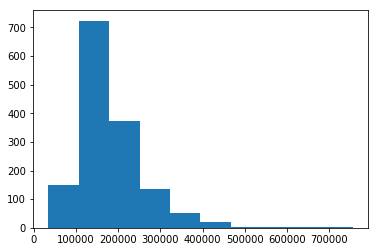

In [33]:
# dummufication 将类转化为数值
data_select2=pd.get_dummies(data_select)
plt.figure()
#将saleprice用hist图画出
plt.hist(data_select2.SalePrice)

## 2.2 特征工程


#### 让价格更趋近于高斯

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

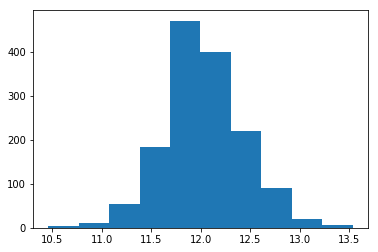

In [34]:
# 用log函数将数据变成高斯分布
data_select2['SalePrice']=np.log(data_select2.SalePrice)
plt.figure()
plt.hist(data_select2.SalePrice)

In [35]:
from scipy.stats import skew
# 选出数据中是数字的列
#下面几行代码
numeric_feats=data_select2.dtypes[data_select2.dtypes!='object'].index
#计算去除null值之后的偏斜度
skewed_feats=data_select2[numeric_feats].apply(lambda x:skew(x.dropna())) #compute skewness
#将偏斜度大于0.75的选出
skewed_feats=skewed_feats[skewed_feats>0.75]
skewed_feats=skewed_feats.index
skewed_feats
                                               

Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=213)

#### 手动选择特征

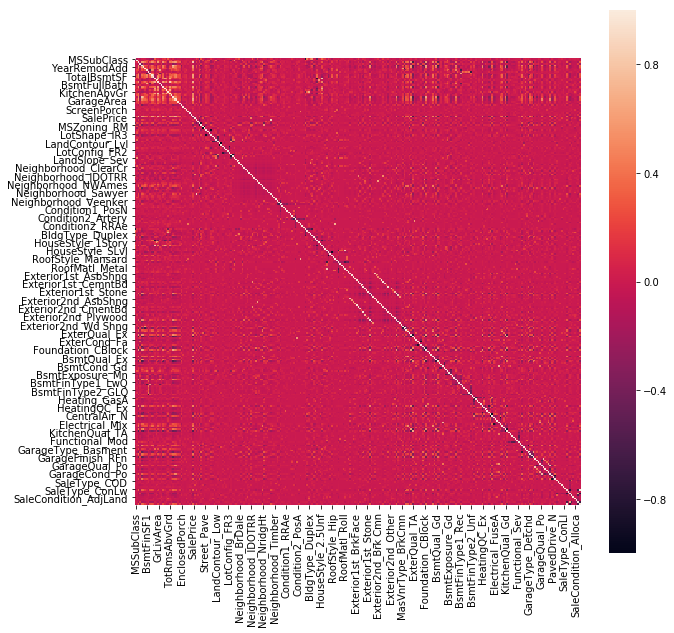

In [36]:
import seaborn as sns
data_analysis=data_select2
# corr 计算相关性系数
corr_matrix=data_analysis.corr()
f,ax=plt.subplots(figsize=(10,10))
# cmap =sns.diverging_palette(220,10,as_cmap=True)
#画出相关性热度图
sns.heatmap(corr_matrix,vmax=1,square=True)

In [37]:
#看相关性与saleprice有关的
sub_matrix=corr_matrix.SalePrice
#按照排序，然后-1的顺序输出，只输出最后的50个
sub_matrix.sort_values()[::-1][:50]

SalePrice                1.000000
OverallQual              0.817184
GrLivArea                0.700927
GarageCars               0.680625
GarageArea               0.650888
TotalBsmtSF              0.612134
1stFlrSF                 0.596981
FullBath                 0.594771
YearBuilt                0.586570
YearRemodAdd             0.565608
TotRmsAbvGrd             0.534422
Foundation_PConc         0.530840
ExterQual_Gd             0.509675
GarageYrBlt              0.500449
Fireplaces               0.489449
HeatingQC_Ex             0.466706
BsmtQual_Ex              0.463991
BsmtFinType1_GLQ         0.440763
MasVnrArea               0.429531
GarageFinish_Fin         0.418881
GarageType_Attchd        0.415787
KitchenQual_Ex           0.413936
KitchenQual_Gd           0.406601
BsmtFinSF1               0.372023
GarageCond_TA            0.365783
ExterQual_Ex             0.356133
Neighborhood_NridgHt     0.351802
CentralAir_Y             0.351600
Exterior2nd_VinylSd      0.337444
Exterior1st_Vi

## 模型测试

通过测试，找到合适的参数

## 代价函数

预测函数h(x)=wx+b        
代价函数是误差平方和

##  特征选择

In [38]:
#cross——validate是 对数据进行训练一次，然后评估
from sklearn.model_selection import cross_validate
#基于最小二乘法的线性回归
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

In [14]:
# 将训练集和测试集分开
train,test=train_test_split(data_select2.copy(),test_size=0.1)

train_=train.copy()
train_y=train_.pop('SalePrice')
train_x=train_

test_=test.copy()
test_y=test_.pop('SalePrice')
test_x=test_

In [15]:
# 尝试用不同的特征测量被解释的误差
mask=['LotArea']
mask=train_x.columns
#lr线性回归的简称
lr=LinearRegression()
#测量方法为r2，
scores=cross_validate(lr,train_x[mask],train_y,scoring='r2',cv=5,return_train_score=True)
scores['test_score'].mean()

0.8217612120951451

SyntaxError: invalid character in identifier (<ipython-input-43-65a8ed84d673>, line 1)

In [41]:
scores

{'fit_time': array([0.00616217, 0.00327301, 0.00310969, 0.00188589, 0.00247717]),
 'score_time': array([0.00177503, 0.00128698, 0.00336313, 0.00085092, 0.00095582]),
 'test_score': array([-0.13757837,  0.16582859,  0.09860867,  0.01255893,  0.12015117]),
 'train_score': array([0.14560206, 0.08416308, 0.10320469, 0.11676156, 0.10441622])}

In [16]:
def feature_select(train_x,train_y,lr,features):
    Scores=[]
    for col in train_x.columns.drop(features):
        #attention need to make copy, or feature will change
        mask=features.copy()
        mask.append(col)
        scores=cross_validate(lr,train_x[mask],train_y,scoring='r2',cv=5,return_train_score=True)
    Scores=np.array(Scores)
    # astype 转换数据格式  argsort返回索引值
    index=Scores[:,1].astype(np.float).argsort()
    return Scores[:,0][index[::-1]]

In [17]:
ordered_features=['LotArea']
#这里是找200个特征，写个循环就ok
while len(ordered_features)<200:
    feature=feature_select(train_x,train_y,lr,ordered_features)[0]
    ordered_features.append(feature)

IndexError: too many indices for array

In [18]:
ordered_features

['LotArea']

In [19]:
train, test=train_test_split(data_select2.copy(),test_size=0.5)

train_=train.copy()
train_y=train_.pop('SalePrice')
train_x=train_

test_=test.copy()
test_y=test_.pop('SalePrice')
test_x=test_

ScoresCum=[]
mask=['LotArea']
for col in ordered_features[:100]:
    mask.append(col)
    scores=cross_validate(lr,train_x[mask],train_y,scoring='r2',cv=5,return_train_score=True)
    ScoresCum.append([col,scores['train_score'].mean(),scores['test_score'].mean(),scores['test_score'].std()])

0 ['LotArea', 0.07796175972237782, -0.018682566765716935, 0.20817671712903]


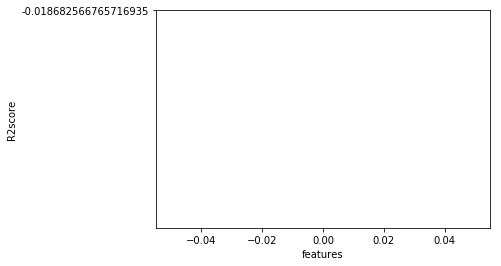

In [20]:
plt.plot(np.array(ScoresCum)[:,1],color='b') 
plt.plot(np.array(ScoresCum)[:,2],color='r') #训练误差
plt.xlabel('features')
plt.ylabel('R2score')
plt.ylim(0.2,1)
print(np.array(ScoresCum)[:,1].argmax(),ScoresCum[np.array(ScoresCum)[:,1].argmax()])

In [21]:
#改变test_size的值
train,test=train_test_split(data_select2.copy(),test_size=0.8)

train_=train.copy()
train_y=train_.pop('SalePrice')
train_x=train_

test_=test.copy()
test_y=test_.pop('SalePrice')
test_x=test_

ScoresCum=[]
mask=['LotArea']
for col in ordered_features[:100]:
    mask.append(col)
    scores=cross_validate(lr,train_x[mask],train_y,scoring='r2',cv=5,return_train_score=True)
    ScoresCum.append([col,scores['train_score'].mean(),scores['test_score'].mean(),scores['test_score'].std()])

0 ['LotArea', 0.1108295237046248, 0.0519137971221779, 0.1070228179066831]


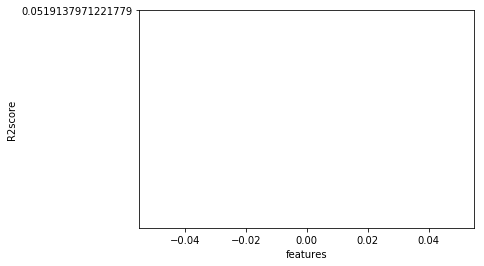

In [22]:
plt.plot(np.array(ScoresCum)[:,1],color='b') 
plt.plot(np.array(ScoresCum)[:,2],color='r') #训练误差
plt.xlabel('features')
plt.ylabel('R2score')
plt.ylim(0.6,1)
print(np.array(ScoresCum)[:,1].argmax(),ScoresCum[np.array(ScoresCum)[:,1].argmax()])

## 模型测试

In [45]:
train,test=train_test_split(data_select2.copy(),test_size=0.5)

train_=train.copy()
train_y=train_.pop('SalePrice')
train_x=train_

test_=test.copy()
test_y=test_.pop('SalePrice')
test_x=test_

mask=ordered_features
lr.fit(train_x[mask[:25]],train_y)
y_pred=lr.predict(test_x[mask[:25]])
len(train),len(test)

(730, 730)

In [46]:
test['Predict']=y_pred
test[['Predict','SalePrice']].head()

,Predict,SalePrice
443,11.963465,12.058153
58,12.048637,12.991753
1458,12.014036,11.864462
956,11.940584,11.728037
242,11.972872,11.277203


In [47]:
print('r2 test: %.3f' %(r2_score(y_true=test_y,y_pred=y_pred)))

r2 test: 0.064


In [49]:
# Lasso 线性回归
train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.0,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,55.705479,10869.449315,6.054795,5.595890,1970.998630,1985.310959,95.165906,448.327397,48.097260,555.298630,...,0.0,0.075342,0.002740,0.878082,0.073973,0.005479,0.008219,0.015068,0.819178,0.078082
std,42.102847,11599.532099,1.383723,1.135406,29.669163,20.500675,171.138604,443.729766,163.918479,432.236191,...,0.0,0.264124,0.052306,0.327415,0.261906,0.073871,0.090348,0.121909,0.385134,0.268485
min,20.000000,1477.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7678.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,231.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,9514.000000,6.000000,5.000000,1971.500000,1995.000000,0.000000,384.000000,0.000000,460.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,11896.250000,7.000000,6.000000,2000.000000,2004.000000,144.750000,701.250000,0.000000,796.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2260.000000,1474.000000,2121.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
from sklearn.linear_model import Ridge,RidgeCV,ElasticNet,LassoCV,LassoLarsCV,Lasso
from sklearn.model_selection import cross_val_score

In [94]:
def r2_cv(model):
    rmse=cross_val_score(model,X_train,y,scoring='neg_mean_squared_error',cv=5)
    return rmse

In [95]:
clf=LinearRegression()
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)
print('r2 test: %.3f' %(r2_score(y_true=test_y,y_pred=y_pred)))

r2 test: 0.824


In [96]:
#clf=Lasso(alpha=0.0)  alpha=0.0说明正则化最弱，牵狗的绳子最弱
clf=Lasso(alpha=0)
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)
print('r2 test: %.3f' %(r2_score(y_true=test_y,y_pred=y_pred)))

r2 test: 0.823


In [97]:
param_range=np.logspace(-6,-1,num=20)
param_range

array([1.00000000e-06, 1.83298071e-06, 3.35981829e-06, 6.15848211e-06,
       1.12883789e-05, 2.06913808e-05, 3.79269019e-05, 6.95192796e-05,
       1.27427499e-04, 2.33572147e-04, 4.28133240e-04, 7.84759970e-04,
       1.43844989e-03, 2.63665090e-03, 4.83293024e-03, 8.85866790e-03,
       1.62377674e-02, 2.97635144e-02, 5.45559478e-02, 1.00000000e-01])

In [98]:
Score=[]
for par in param_range:
    clf=Lasso(alpha=par)
    Score.append((cross_val_score(clf,train_x,train_y,scoring='r2',cv=5)))

Text(0, 0.5, 'r2')

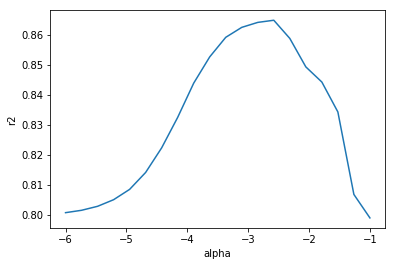

In [99]:
plt.plot(np.linspace(-6,-1,20),np.array(Score).mean(axis=1))
plt.xlabel('alpha')
plt.ylabel('r2')

In [103]:
clf=Lasso(alpha=0.001)
clf.fit(train_x,train_y)
#过滤出一组不是0的特征
index=clf.coef_!=0
index=list(test_x.columns[index])

In [104]:
lr=LinearRegression()
train_x[index].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,KitchenQual_Ex,Functional_Typ,GarageType_Attchd,GarageCond_TA,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
354,50,8400,6,5,1940,2000,0.0,388,0,552,...,0,1,1,1,0,1,0,1,0,1
405,20,9991,4,4,1976,1993,0.0,1116,0,165,...,0,0,1,1,0,1,0,1,0,1
588,20,25095,5,8,1968,2003,0.0,1324,0,113,...,1,1,1,1,0,1,0,1,0,0
1288,120,5664,8,5,2000,2000,0.0,1158,0,343,...,1,1,1,1,0,1,0,1,0,1
943,90,25000,5,4,1967,1967,0.0,0,0,1632,...,0,1,1,1,0,0,0,1,0,1


In [105]:
lr.fit(train_x,train_y)
y_pred=clf.predict(test_x)
print('r2 test: %.3f' %(r2_score(y_true=test_y,y_pred=y_pred)))

r2 test: 0.867
